<a href="https://colab.research.google.com/github/sahibpreetsingh12/100daysofcode/blob/master/Cats_and_Dogs_CLassifier_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()


'/device:GPU:0'

DOWNLOAD MODEL
from [filename](https://drive.google.com/file/d/1u-Wf6ZU4QMcyLhOsLJ6oaa9tS5hnGZzZ/view?usp=sharing)

In [0]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
!unzip kagglecatsanddogs_3367a.zip
!mv PetImages train

# **CATS AND DOGS CLASSIFIER**

In [0]:
!pip install -q keras

In [0]:
from glob import glob
from sklearn.model_selection import train_test_split

cats = glob('train/Cat/*.jpg')
dogs = glob('train/Dog/*.jpg')

cats_train, cats_test = train_test_split(cats, test_size=0.30)
dogs_train, dogs_test = train_test_split(dogs, test_size=0.30)

TRAIN_DIR = 'train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/Cat
files = ' '.join(cats_test)
!mv -t test/Cat $files

!mkdir test/Dog
files = ' '.join(dogs_test)
!mv -t test/Dog $files

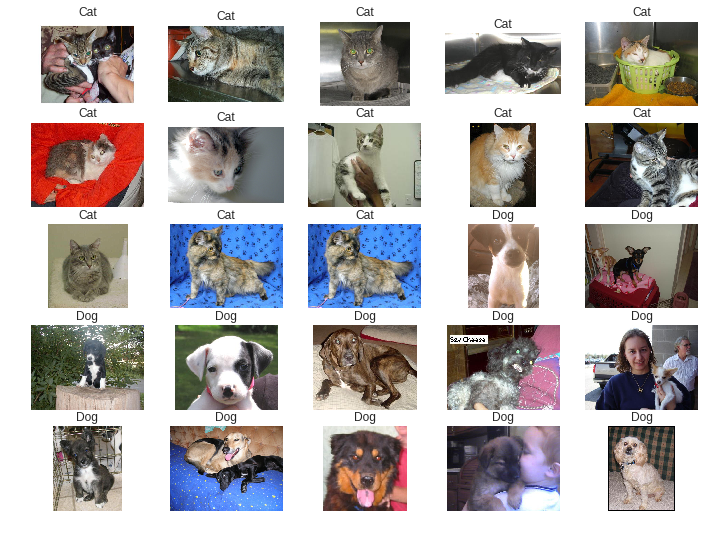

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

cats = np.random.choice(cats_train, 13)#Creates a numpy array of length 13 frim cats_train ARRAY to get 13 random names of cats files
dogs = np.random.choice(dogs_train, 12)#Creates a numpy array of length 13 frim dogs_train ARRAY to get 13 random names of dogs files
data = np.concatenate((cats, dogs))
labels = 13 * ['Cat'] + 12 *['Dog']

R, C = 5, 5
plt.figure(figsize=(12, 9))
for k, (src, label) in enumerate(zip(data, labels)):
    #print(src,label,k)
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)# makes subplots for R=5 rows C=5 columns and k+1=index because index starts at 1 in the upper left corner and increases to the right.
    plt.title(label)
    #h=np.asarray(im)
    plt.imshow(np.asarray(im))
    #print(type(h),h.shape)
    plt.axis('off')

In [6]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 2
    
# setup model
# to load the model and their weights but leaving out the last fully connected layer, since that is specific to the ImageNet competition.
base_model =InceptionV3(weights='imagenet', include_top=False)

x = base_model.output#it is a tensor



Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


87916544/87910968 [==============================] - 1s 0us/step


In [7]:

x = GlobalAveragePooling2D(name='avgpool')(x)
#print(type(x),x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
#print("sahib")
#print(predictions,type(predictions))
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
print(base_model.output,type(base_model.output))

Tensor("mixed10/concat:0", shape=(?, ?, ?, 2048), dtype=float32) <class 'tensorflow.python.framework.ops.Tensor'>


# **Image Augmentation**

Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

Sample-wise standardization.
Feature-wise standardization.
ZCA whitening.
Random rotation, shifts, shear and flips.
Dimension reordering.
Save augmented images to disk.

In [9]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,#TRAIN DIR is train
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')
    
validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,#TEST DIR is test
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')



Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [11]:
EPOCHS = 1
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'filename.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/1
320/320 [==============================] - 334s 1s/step - loss: 0.2345 - acc: 0.8992 - val_loss: 0.1326 - val_acc: 0.9478


# NUMPY SHAPE

For 1D array, return a shape tuple with only 1 element (i.e. (n,))

For 2D array, return a shape tuple with only 2 elements (i.e. (n,m))

For 3D array, return a shape tuple with only 3 elements (i.e. (n,m,k))

For 4D array, return a shape tuple with only 4 elements (i.e. (n,m,k,j))

and so on.

In [0]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from PIL import Image

[Important to see](https://stackoverflow.com/questions/47555829/preprocess-input-method-in-keras)

In [31]:

def predict(model, img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    print(preds,preds[0])
    return preds[0]
img = image.load_img('test/Dog/10000.jpg', target_size=(HEIGHT, WIDTH))
preds = predict(load_model(MODEL_FILE), img)

img = image.load_img('test/Cat/1000.jpg', target_size=(HEIGHT, WIDTH))
preds1 = predict(load_model(MODEL_FILE), img)



[[0.03188175 0.96811825]] [0.03188175 0.96811825]
[[9.9965215e-01 3.4785664e-04]] [9.9965215e-01 3.4785664e-04]


In [25]:
print(preds)

[0.03188175 0.96811825]


In [32]:
generator= train_datagen.flow_from_directory("train", batch_size=32)
label_map = (generator.class_indices)
print(label_map)
y_classes = preds.argmax(axis=-1)
print(y_classes)
y_classes = preds1.argmax(axis=-1)
print(y_classes)

Found 17500 images belonging to 2 classes.
{'Cat': 0, 'Dog': 1}
1
0
